In [11]:
#About the data:
#https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

# State	                    : 거주구역
# Sex	                    : 성별
# GeneralHealth	            : 일상적인 몸 상태 [Excellent, Very good, Good, Fair, Poor]
# PhysicalHealthDays	    : 30일 기준, 질병이나 부상 등 신체적으로 아픈 날 수
# MentalHealthDays	        : 30일 기준, 우울이나 스트레스 등 정신적으로 아픈 날 수
# LastCheckupTime	        : 마지막으로 검진 받은 기록 [1년 이내, 1~2년, 2~5년, 5년 이상]
# PhysicalActivities	    : 운동 / 신체적 활동 있는지
# SleepHours	            : 수면 시간
# RemovedTeeth	            : 발치 수
# HadHeartAttack	        : 심장마비 경험 //심장
# HadAngina                 : 협심증 //심장
# HadStroke                 : 뇌졸증 //뇌
# HadAsthma                 : 천식 //폐
# HadSkinCancer             : 피부암
# HadCOPD                   : 만성폐쇄성폐질환 //폐
# HadDepressiveDisorder     : 우울증 
# HadKidneyDisease          : 신부증
# HadArthritis              : 관절염
# HadDiabetes               : 당뇨 [당뇨 아님, 전당뇨거나 경계성 당뇨, 임신성 당뇨, 당뇨]
# DeafOrHardOfHearing       : 청각장애
# BlindOrVisionDifficulty	: 시각장애
# DifficultyConcentrating	: 집중하기 힘듦
# DifficultyWalking	        : 걷기 힘듦
# DifficultyDressingBathing	: 스스로 옷을 입거나 씻기 힘듦
# DifficultyErrands	        : 일상 업무에 어려움
# SmokerStatus	            : 흡연자 [비흡연자, 금연, 종종 흡연, 매일 흡연]
# ECigaretteUsage	        : 전자담배 흡연자 [경헙 없음, 현재는 사용하지 않음, 종종 흡연, 매일 흡연]
# ChestScan	                : 가슴 CT 나 X-ray 촬영 여부
# RaceEthnicityCategory	    : 인종 [히스패닉, 흑인, 백인, 여러인종, 다른 인종) [다른 인종들은 히스패닉이 아닌 경우에만 표시]
# AgeCategory	            : 나이 카테고리 [18~24, 25~29, 30~34, 35~39, 40~44, 45~49, 50~54, 55~59, 60~64, 65~69, 70~74, 75~79, 80이상]
# HeightInMeters	        : 키
# WeightInKilograms	        : 몸무게
# BMI	                    : BMI
# AlcoholDrinkers	        : 음주 여부
# HIVTesting	            : HIV 검사 결과
# FluVaxLast12	            : 12개월 안에 감기 백신 접종 여부
# PneumoVaxEver	            : 폐렴 백신 접종 경험
# TetanusLast10Tdap	        : 10년 안에 파상풍 주사 경험 [경험 없음, Tdap 주사, Tdap 외의 다른 약물 주사, 어떤 약물인지 모름]
# HighRiskLastYear	        : 지난해 위험한 사고나 질병 경험 유무
# CovidPos                  : 코로나 확진 여부

보통 심장병의 제일 큰 major factor 는 고혈압, 고 콜레스트롤, 담배.
그 외, 당뇨, 비만 (BMI 높음), 신체적 활동, 음주과다 등도 있음.
classes are unbalanced. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import RobustScaler, StandardScaler, MaxAbsScaler
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

In [2]:
dataset = pd.read_csv("heart_2022_with_nans.csv")
print(dataset.shape)
dataset.head()

(445132, 40)


,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [5]:
dataset.describe()


,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,434205.000000,436065.000000,439679.000000,416480.000000,403054.000000,396326.000000
mean,4.347919,4.382649,7.022983,1.702691,83.074470,28.529842
std,8.688912,8.387475,1.502425,0.107177,21.448173,6.554889
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.130000
50%,0.000000,0.000000,7.000000,1.700000,80.740000,27.440000
75%,3.000000,5.000000,8.000000,1.780000,95.250000,31.750000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.640000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

In [16]:
dataset.isna().sum()

State                            0
Sex                              0
GeneralHealth                 1198
PhysicalHealthDays           10927
MentalHealthDays              9067
LastCheckupTime               8308
PhysicalActivities            1093
SleepHours                    5453
RemovedTeeth                 11360
HadHeartAttack                3065
HadAngina                     4405
HadStroke                     1557
HadAsthma                     1773
HadSkinCancer                 3143
HadCOPD                       2219
HadDepressiveDisorder         2812
HadKidneyDisease              1926
HadArthritis                  2633
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategor

<Axes: xlabel='HadHeartAttack', ylabel='count'>

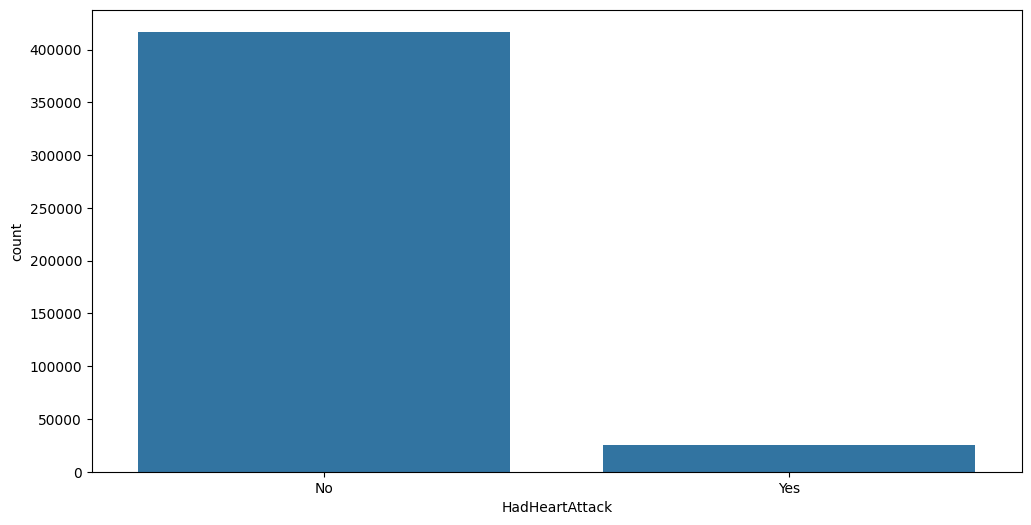

In [19]:
plt.figure(figsize = (12, 6))

sns.countplot(x = 'HadHeartAttack', data = dataset)

In [8]:
#Work with new data

new_data = pd.read_csv("Heart_AfterPrep_0228.csv")
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274034 entries, 0 to 274033
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      274034 non-null  object 
 1   Sex                        274034 non-null  object 
 2   GeneralHealth              274034 non-null  object 
 3   PhysicalHealthDays         274034 non-null  float64
 4   MentalHealthDays           274034 non-null  float64
 5   LastCheckupTime            274034 non-null  object 
 6   PhysicalActivities         274034 non-null  object 
 7   SleepHours                 274034 non-null  float64
 8   RemovedTeeth               274034 non-null  object 
 9   HadHeartAttack             274034 non-null  object 
 10  HadAngina                  274034 non-null  object 
 11  HadStroke                  274034 non-null  object 
 12  HadAsthma                  274034 non-null  object 
 13  HadSkinCancer              27

In [9]:
#일단 임시로 파일 복사후, 그 파일로 작업해보기

temp = new_data.copy()

temp["HeartDisease"] = 0
temp.loc[temp["HadHeartAttack"] == "Yes","HeartDisease"] = 1
temp.loc[temp["HadAngina"] == "Yes","HeartDisease"] = 1

# temp["LungDisease"] = 0
# temp.loc[temp["HadAsthma"] == "Yes", "LungDisease"] = 1
# temp.loc[temp["HadCOPD"] == "Yes", "LungDisease"] = 1

# label encoding 하기 전에, 몇몇 column 들은 0~5 같은 숫자로 (poor, fair, good, very good, excellent 같은) 변환 가능한것들이 있어서 그것들을 먼저 변환 해주기.\
# label encoding 으로 할시에 이것들이 원하는식으로 변환이 안됨.
# 변환후 type 를 float 으로 바꿔놓음. (int 가 될수 있지만 아직 결측치 처리가 안되서 변환 안됨.)



In [6]:

#General Health encoding
temp.loc[temp["GeneralHealth"] == "Poor","GeneralHealth"] = 0
temp.loc[temp["GeneralHealth"] == "Fair","GeneralHealth"] = 1
temp.loc[temp["GeneralHealth"] == "Good","GeneralHealth"] = 2
temp.loc[temp["GeneralHealth"] == "Very good","GeneralHealth"] = 3
temp.loc[temp["GeneralHealth"] == "Excellent","GeneralHealth"] = 4
temp["GeneralHealth"] = temp["GeneralHealth"].astype('int32')

#Last check up time encoding
temp.loc[temp["LastCheckupTime"] == "Within past year (anytime less than 12 months ago)","LastCheckupTime"] = 0
temp.loc[temp["LastCheckupTime"] == "Within past 2 years (1 year but less than 2 years ago)","LastCheckupTime"] = 1
temp.loc[temp["LastCheckupTime"] == "Within past 5 years (2 years but less than 5 years ago)","LastCheckupTime"] = 2
temp.loc[temp["LastCheckupTime"] == "5 or more years ago","LastCheckupTime"] = 3
temp["LastCheckupTime"] = temp["LastCheckupTime"].astype('int32')

#SmokerStatus
temp.loc[temp["SmokerStatus"] == "Never smoked","SmokerStatus"] = 0
temp.loc[temp["SmokerStatus"] == "Former smoker","SmokerStatus"] = 1
temp.loc[temp["SmokerStatus"] == "Current smoker - now smokes some days","SmokerStatus"] = 2
temp.loc[temp["SmokerStatus"] == "Current smoker - now smokes every day","SmokerStatus"] = 3
temp["SmokerStatus"] = temp["SmokerStatus"].astype('int32')


#ECigaretteUsage
temp.loc[temp["ECigaretteUsage"] == "Never used e-cigarettes in my entire life","ECigaretteUsage"] = 0
temp.loc[temp["ECigaretteUsage"] == "Not at all (right now)","ECigaretteUsage"] = 1
temp.loc[temp["ECigaretteUsage"] == "Use them some days","ECigaretteUsage"] = 2
temp.loc[temp["ECigaretteUsage"] == "Use them every day","ECigaretteUsage"] = 3
temp["ECigaretteUsage"] = temp["ECigaretteUsage"].astype('int32')


#RemovedTeeth
temp.loc[temp["RemovedTeeth"] == "None of them","RemovedTeeth"] = 0
temp.loc[temp["RemovedTeeth"] == "None of Them","RemovedTeeth"] = 0
temp.loc[temp["RemovedTeeth"] == "1 to 5","RemovedTeeth"] = 1
temp.loc[temp["RemovedTeeth"] == "6 or more, but not all","RemovedTeeth"] = 2
temp.loc[temp["RemovedTeeth"] == "All","RemovedTeeth"] = 3
temp["RemovedTeeth"] = temp["RemovedTeeth"].astype('int32')

#HadDiabetes
temp.loc[temp["HadDiabetes"] == "No","HadDiabetes"] = 0
temp.loc[temp["HadDiabetes"] == "Yes, but only during pregnancy (female)","HadDiabetes"] = 0
temp.loc[temp["HadDiabetes"] == "No, pre-diabetes or borderline diabetes","HadDiabetes"] = 1
temp.loc[temp["HadDiabetes"] == "Yes","HadDiabetes"] = 2
temp["HadDiabetes"] = temp["HadDiabetes"].astype('int32')

#Covid
temp['CovidPos'].replace({'Tested positive using home test without a health professional' : 'Yes'}, inplace=True)

#RaceEthnicityCategory Hispanic = 0, non hispanic = 1
temp.loc[temp["RaceEthnicityCategory"] == "Black only, Non-Hispanic","RaceEthnicityCategory"] = 1
temp.loc[temp["RaceEthnicityCategory"] == "Multiracial, Non-Hispanic","RaceEthnicityCategory"] = 1
temp.loc[temp["RaceEthnicityCategory"] == "Other race only, Non-Hispanic","RaceEthnicityCategory"] = 1
temp.loc[temp["RaceEthnicityCategory"] == "White only, Non-Hispanic","RaceEthnicityCategory"] = 1
temp.loc[temp["RaceEthnicityCategory"] == "Hispanic","RaceEthnicityCategory"] = 0
temp["RaceEthnicityCategory"] = temp["RaceEthnicityCategory"].astype('int32')


In [7]:
#나이 인코딩
ages = {
    'Age 80 or older': 80,
    'Age 55 to 59': 55,
    'Age 40 to 44': 40,
    'Age 75 to 79': 75,
    'Age 70 to 74': 70,
    'Age 65 to 69': 65,
    'Age 60 to 64': 60,
    'Age 50 to 54': 50,
    'Age 45 to 49': 45,
    'Age 35 to 39': 35,
    'Age 30 to 34': 30,
    'Age 25 to 29': 25,
    'Age 18 to 24': 18
}

temp['AgeCategory'] = temp['AgeCategory'].map(lambda x: ages[x])

In [8]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274034 entries, 0 to 274033
Data columns (total 42 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      274034 non-null  object 
 1   Sex                        274034 non-null  object 
 2   GeneralHealth              274034 non-null  int32  
 3   PhysicalHealthDays         274034 non-null  float64
 4   MentalHealthDays           274034 non-null  float64
 5   LastCheckupTime            274034 non-null  int32  
 6   PhysicalActivities         274034 non-null  object 
 7   SleepHours                 274034 non-null  float64
 8   RemovedTeeth               274034 non-null  int32  
 9   HadHeartAttack             274034 non-null  object 
 10  HadAngina                  274034 non-null  object 
 11  HadStroke                  274034 non-null  object 
 12  HadAsthma                  274034 non-null  object 
 13  HadSkinCancer              27

In [7]:
#one hot encoding for RaceEthnicityCategory, TetanusLast10Tdap

temp_encoded = pd.get_dummies(temp, columns = ['RaceEthnicityCategory', 'TetanusLast10Tdap'])

for col in temp_encoded.columns:
    print(col)
    print(temp_encoded[col].unique())
    print('-'*50)

State
['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Guam' 'Puerto Rico'
 'Virgin Islands']
--------------------------------------------------
Sex
['Female' 'Male']
--------------------------------------------------
GeneralHealth
[4 1 0 3 2]
--------------------------------------------------
PhysicalHealthDays
[ 0.  2.  1.  5. 30. 23. 14.  4. 15.  3. 10.  7. 25.  6. 21. 20. 29.  8.
 16.  9. 27. 12. 13. 11. 28. 17. 24. 26. 18. 22. 19.]
---

In [8]:
le = LabelEncoder()

for columns in temp_encoded.select_dtypes(include=[object, bool]).columns:
    temp_encoded[columns] = le.fit_transform(temp_encoded[columns]) # 전처리 하기 전에 Object 값을 가지고 있는 행을 일단 일시적으로 label encoding 해보기.
    #No = 0
    #yes = 1
    


# EDA Visualization

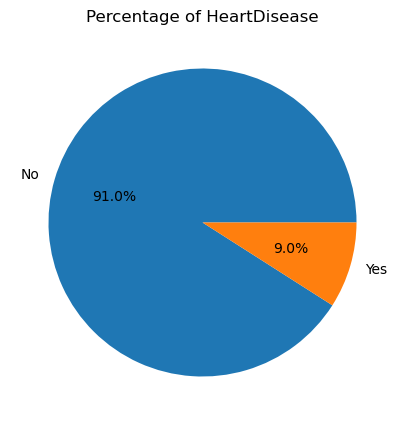

In [11]:
value_c = temp_encoded['HeartDisease'].value_counts()
labels = ['No', 'Yes']

plt.figure(figsize=(5,5))
plt.pie(value_c, labels=labels, autopct='%1.1f%%', startangle=0)
plt.title('Percentage of HeartDisease')
plt.show()

남자가 여자보다 심장병 있는사람이 더 많다.

<Axes: xlabel='Sex'>

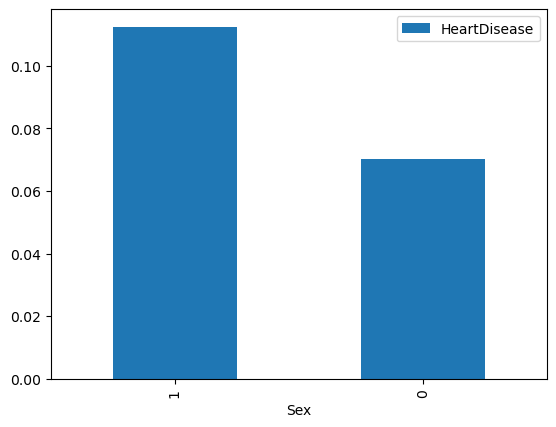

In [86]:
temp_encoded[['Sex', 'HeartDisease']].groupby(['Sex']).mean().sort_values(by = 'HeartDisease', ascending = False).plot.bar()
#남자 1, 여자 0

심장병이랑 담배의 연관성.

<Axes: xlabel='SmokerStatus'>

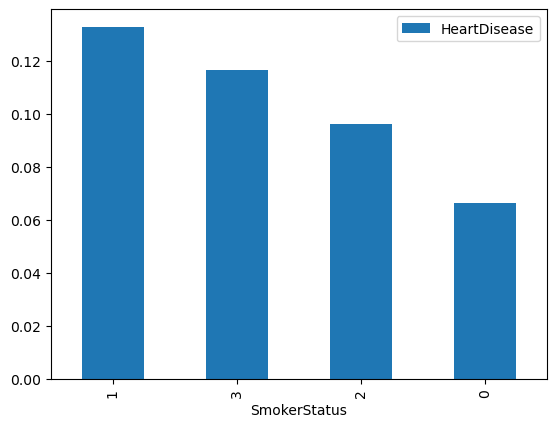

In [42]:
temp_encoded[['SmokerStatus', 'HeartDisease']].groupby(['SmokerStatus']).mean().sort_values(by = 'HeartDisease', ascending = False).plot.bar()
#0이 아예 안피워보고, 3이 가장 많이 피움.
#많이 피울수록 심장병 확률이 높음. 특이하게 전에 폈다가 말은 사람의 수치가 높음. (heart attack 으로만 보면 3,2,1,0 순으로 됨.)

<Axes: xlabel='ECigaretteUsage'>

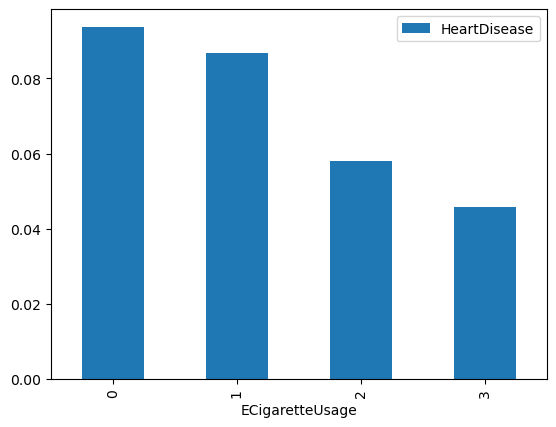

In [50]:
temp_encoded[['ECigaretteUsage', 'HeartDisease']].groupby(['ECigaretteUsage']).mean().sort_values(by = 'HeartDisease', ascending = False).plot.bar()
#0은 안피워봤고, 3은 자주 사용.
#많이 피우는 사람이 좀더 낮음. (조금 이상한거 같기는함)

<Axes: xlabel='ECigaretteUsage,SmokerStatus'>

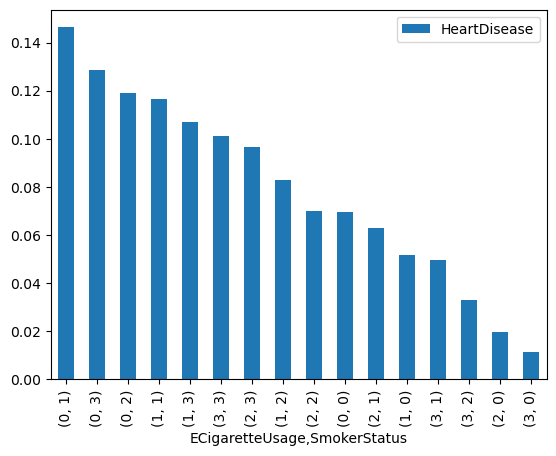

In [51]:
temp_encoded[['ECigaretteUsage', 'SmokerStatus', 'HeartDisease']].groupby(['ECigaretteUsage', 'SmokerStatus']).mean().sort_values(by = ['HeartDisease'], ascending = False).plot.bar()

#그냥 담배 피우는사람이랑 전자담배 피우는사람 합쳐서 heart disease 보기.
#위에 데이터랑 비슷하게 전자담배 피우는 경우 확률 낮고, 담배 많이 필수록 확률이 높음. 

<Axes: xlabel='RaceEthnicityCategory'>

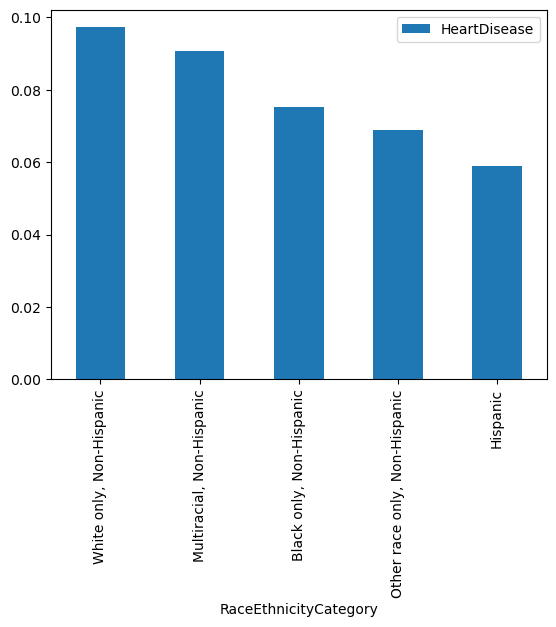

In [52]:
temp[['RaceEthnicityCategory', 'HeartDisease']].groupby(['RaceEthnicityCategory']).mean().sort_values(by = 'HeartDisease', ascending = False).plot.bar()
#can observe hispanic people has lowest rate of heart disease while white have the highest chance.

<Axes: xlabel='TetanusLast10Tdap'>

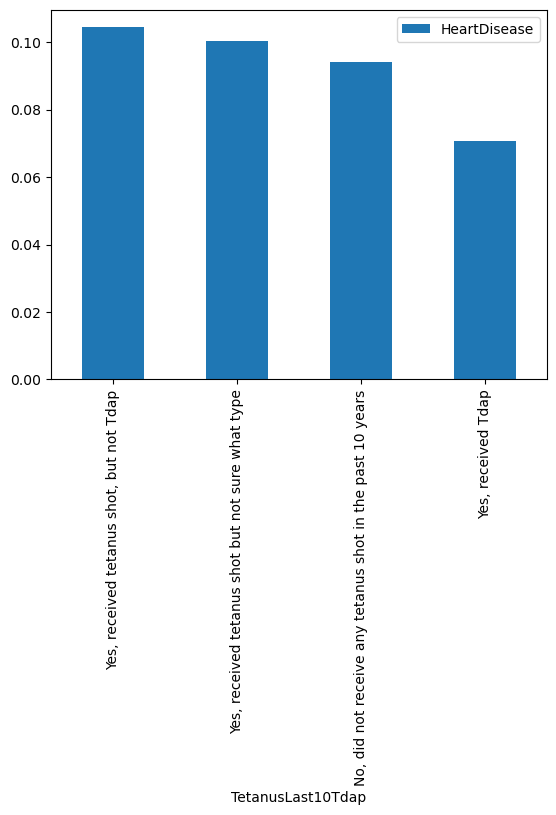

In [58]:
temp[['TetanusLast10Tdap', 'HeartDisease']].groupby(['TetanusLast10Tdap']).mean().sort_values(by = 'HeartDisease', ascending = False).plot.bar()

<Axes: xlabel='AgeCategory'>

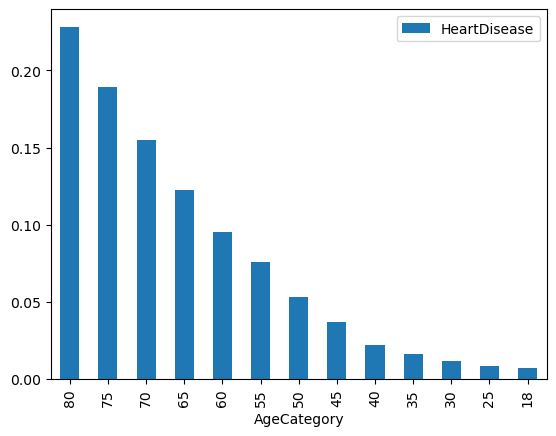

In [54]:
temp_encoded[['AgeCategory', 'HeartDisease']].groupby(['AgeCategory']).mean().sort_values(by = 'HeartDisease', ascending = False).plot.bar()
#the older they are, higher chance of heart disease

# sns.violinplot(data=temp_encoded, x='HeartDisease', y='AgeCategory')

<Axes: xlabel='HeartDisease', ylabel='BMI'>

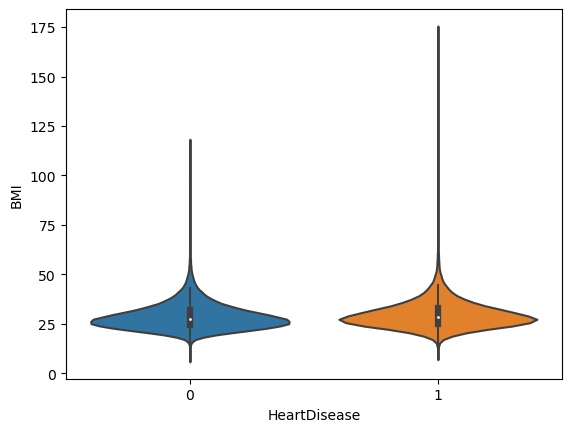

In [13]:
sns.violinplot(data=temp, x='HeartDisease', y='BMI', split=True)

#ax.set_yticks(range(0,100,10))


<Axes: xlabel='AlcoholDrinkers'>

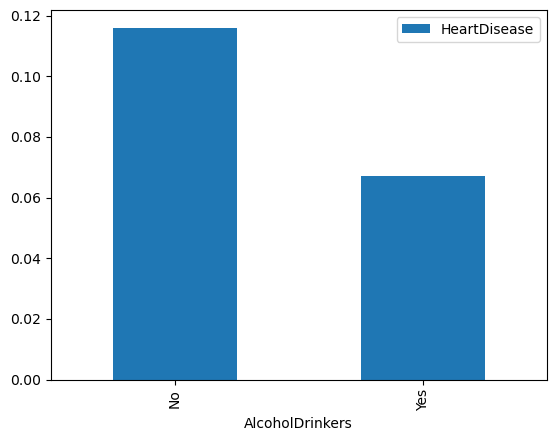

In [57]:
temp[['AlcoholDrinkers', 'HeartDisease']].groupby(['AlcoholDrinkers']).mean().sort_values(by = 'HeartDisease', ascending = False).plot.bar()

<Axes: xlabel='HIVTesting'>

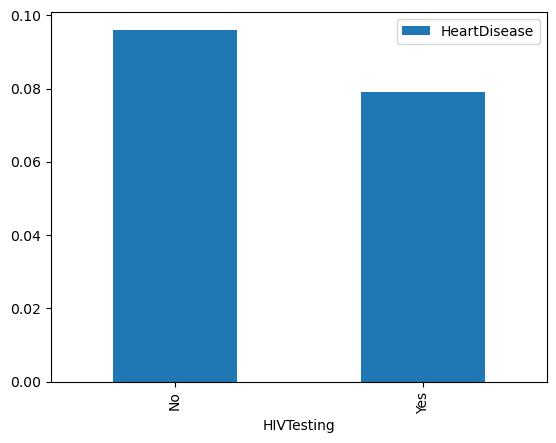

In [56]:
temp[['HIVTesting', 'HeartDisease']].groupby(['HIVTesting']).mean().sort_values(by = 'HeartDisease', ascending = False).plot.bar()
#크게 의미있는 차이는 없음

<Axes: xlabel='PneumoVaxEver'>

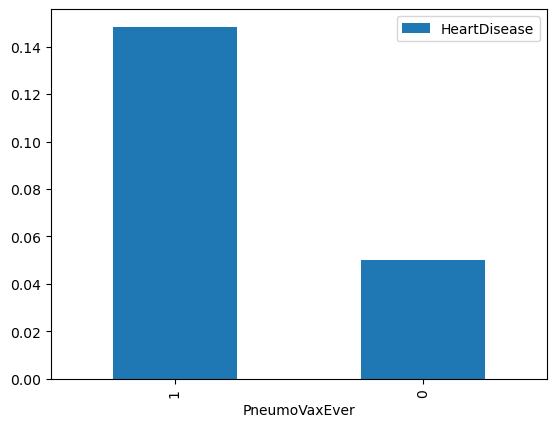

In [58]:
temp_encoded[['PneumoVaxEver', 'HeartDisease']].groupby(['PneumoVaxEver']).mean().sort_values(by = 'HeartDisease', ascending = False).plot.bar()

<Axes: xlabel='HadDiabetes'>

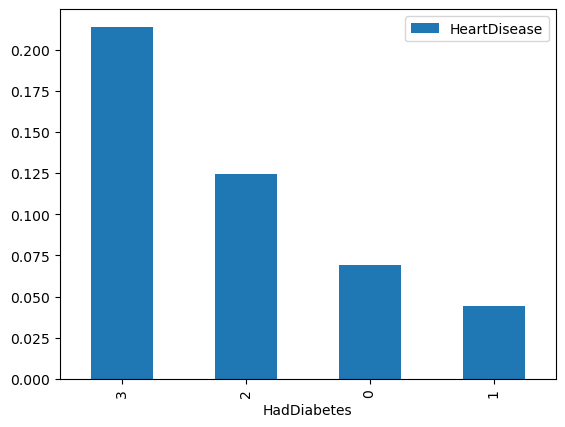

In [57]:
temp_encoded[['HadDiabetes', 'HeartDisease']].groupby(['HadDiabetes']).mean().sort_values(by = 'HeartDisease', ascending = False).plot.bar()

<Axes: xlabel='HighRiskLastYear'>

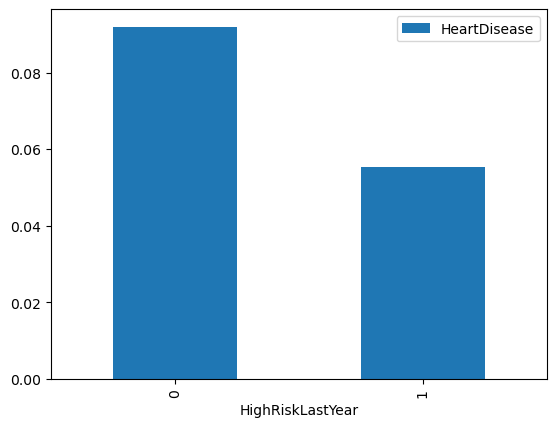

In [59]:
temp_encoded[['HighRiskLastYear', 'HeartDisease']].groupby(['HighRiskLastYear']).mean().sort_values(by = 'HeartDisease', ascending = False).plot.bar()

<Axes: xlabel='State'>

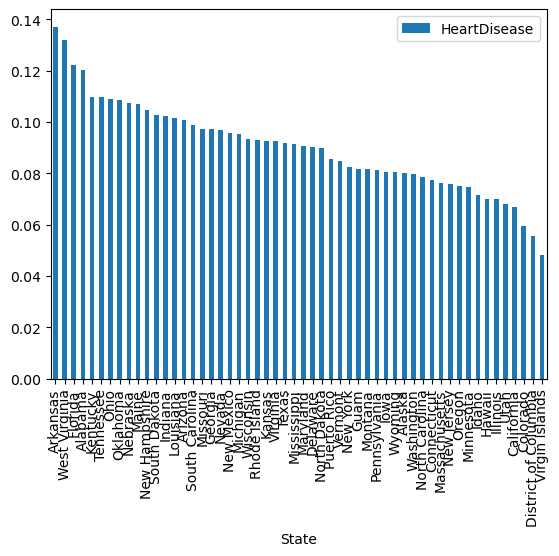

In [37]:
temp[['State', 'HeartDisease']].groupby(['State']).mean().sort_values(by = 'HeartDisease', ascending = False).plot.bar()

c:\Users\User\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\core.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


ValueError: Grouper for 'HeartDisease' not 1-dimensional

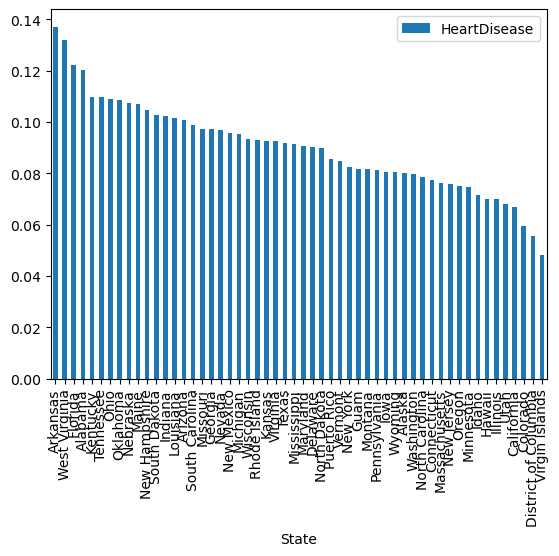

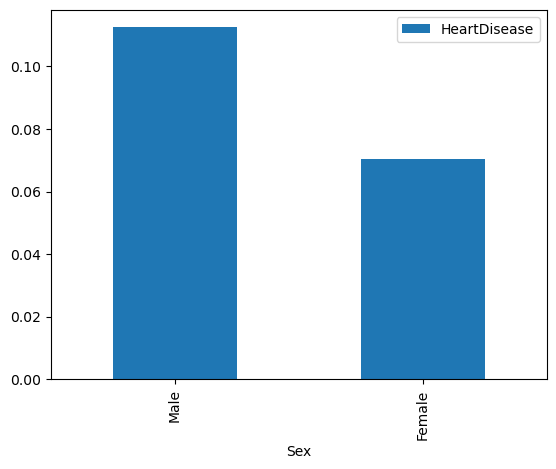

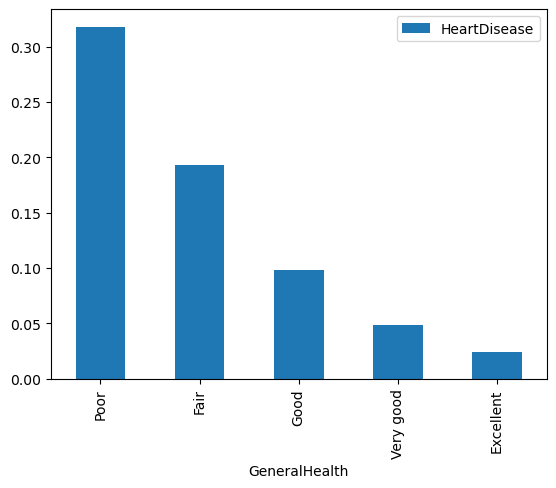

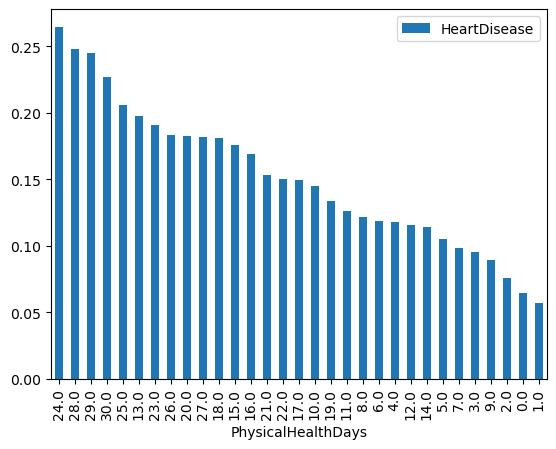

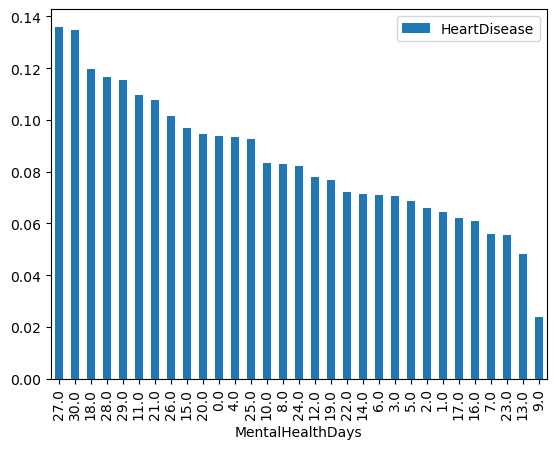

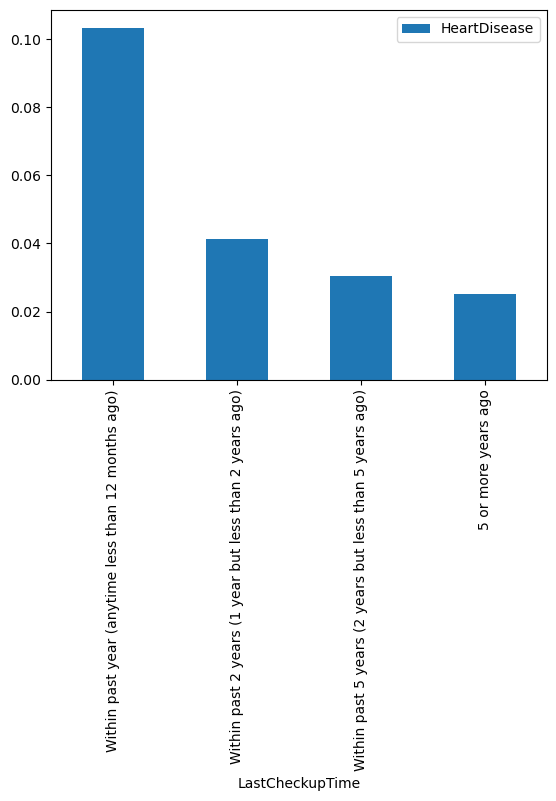

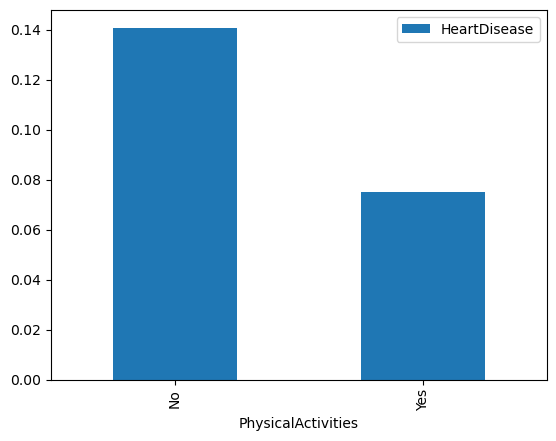

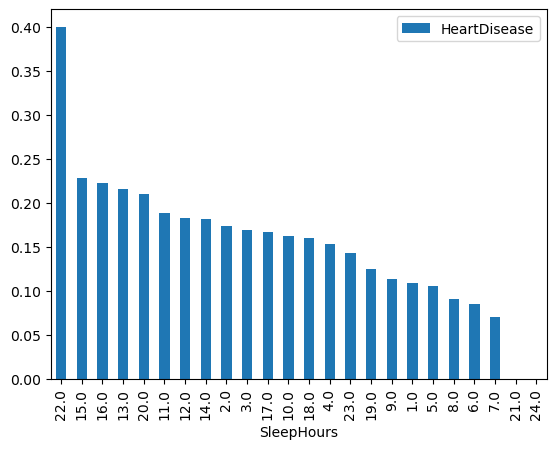

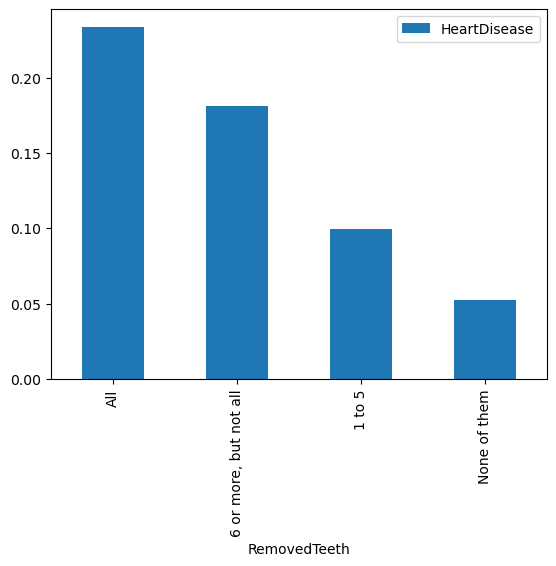

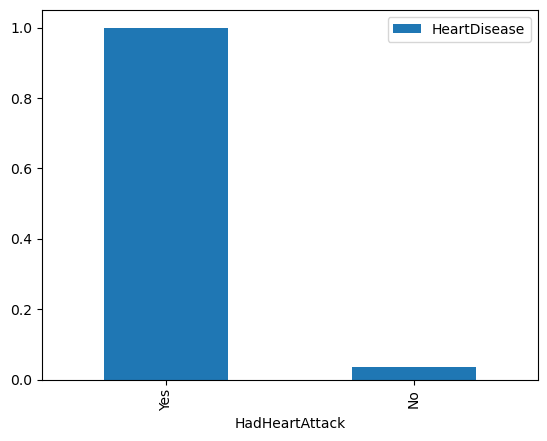

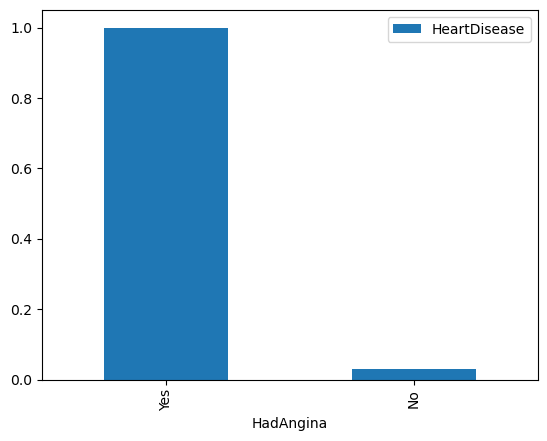

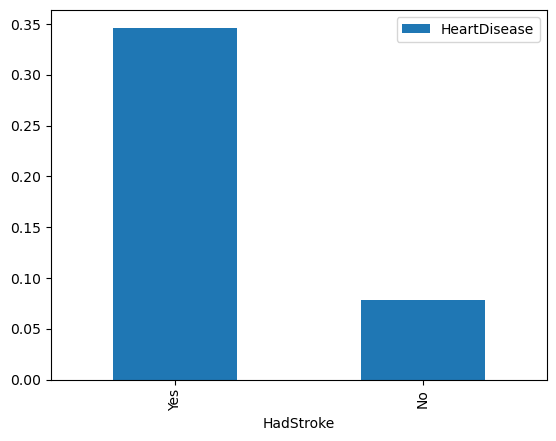

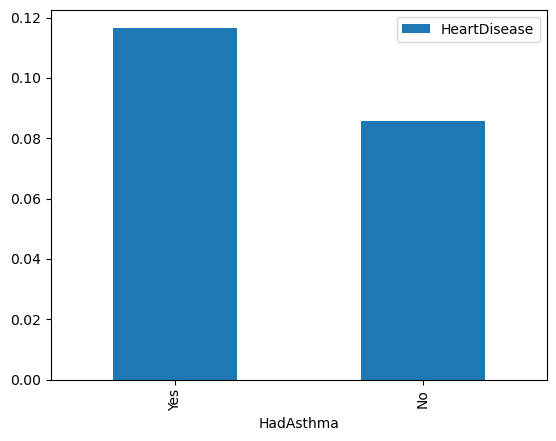

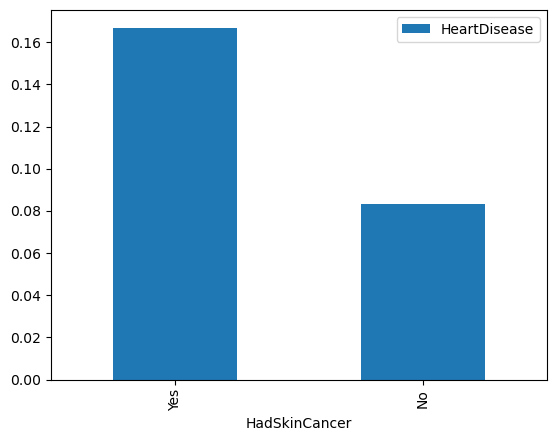

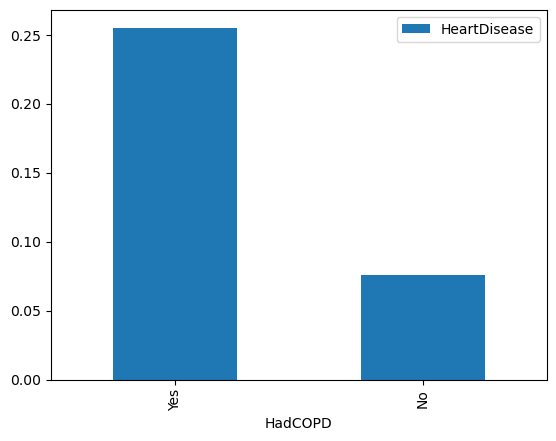

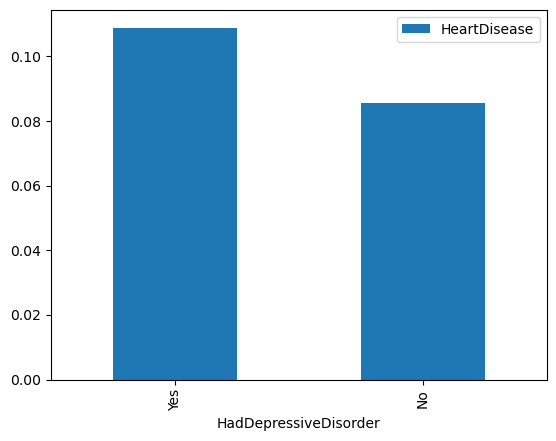

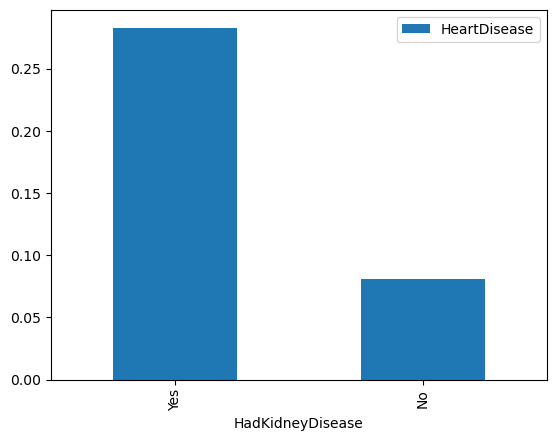

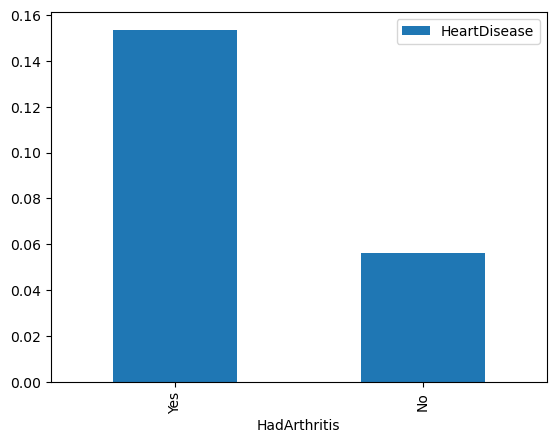

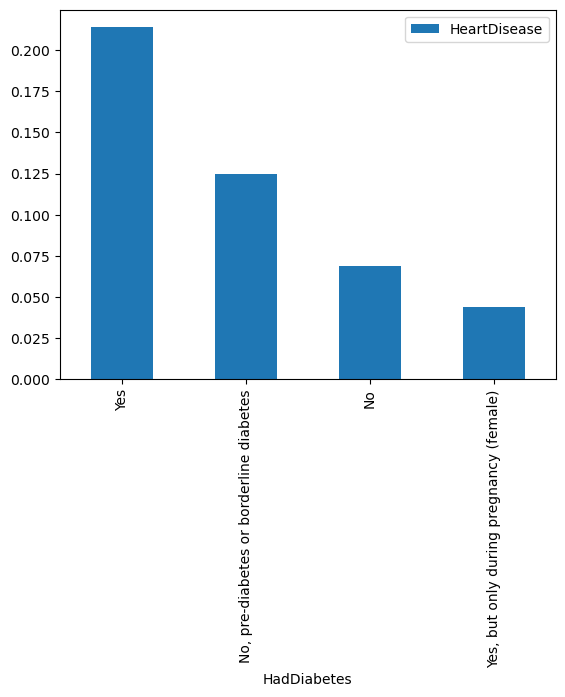

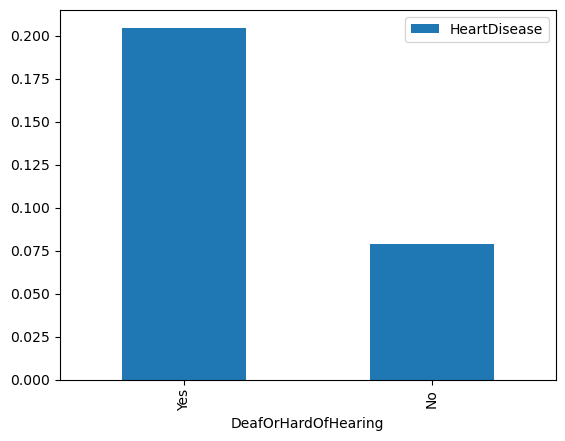

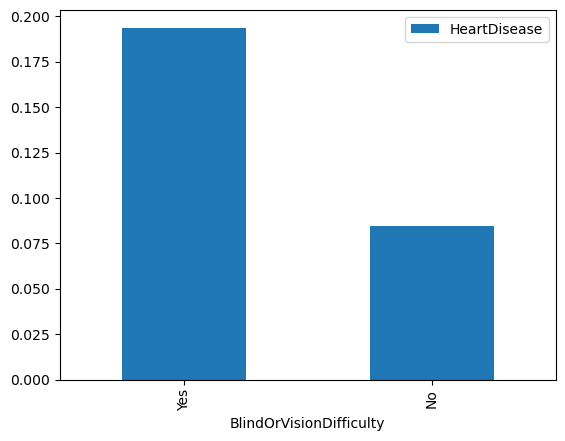

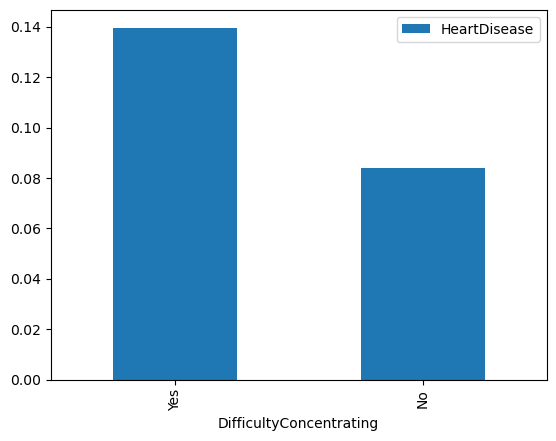

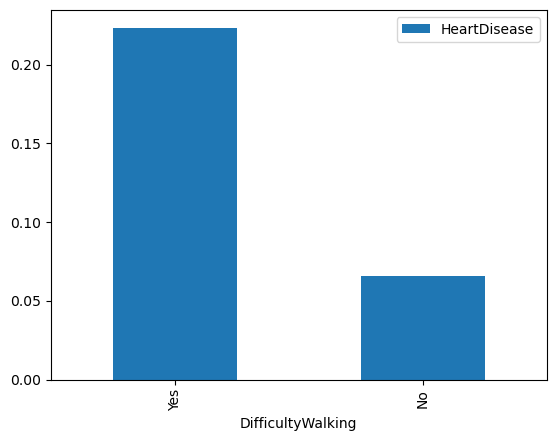

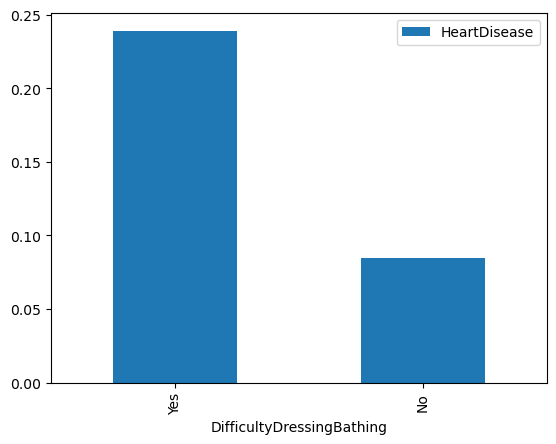

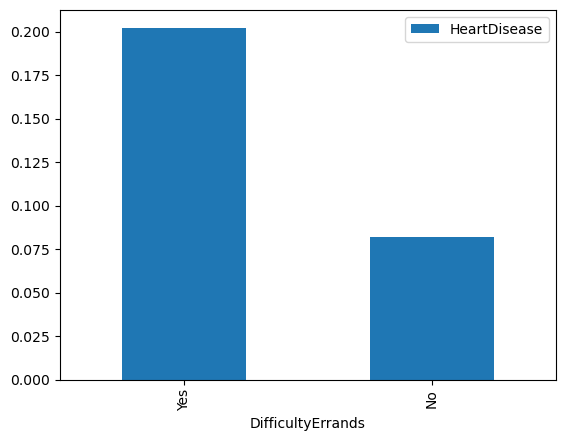

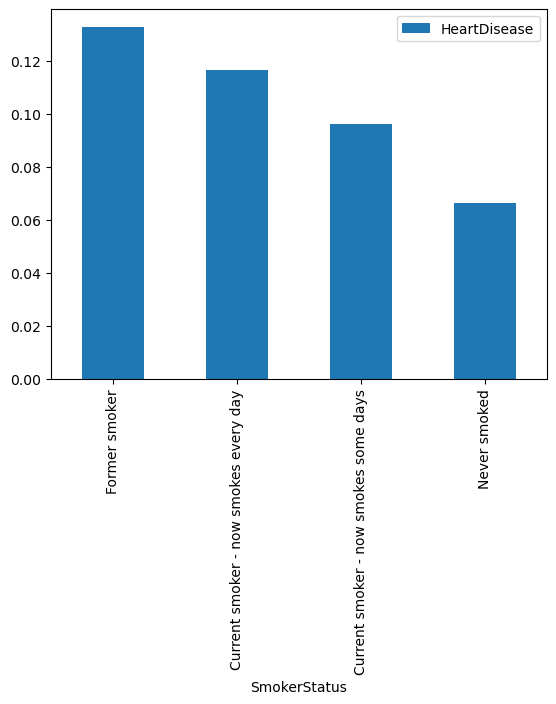

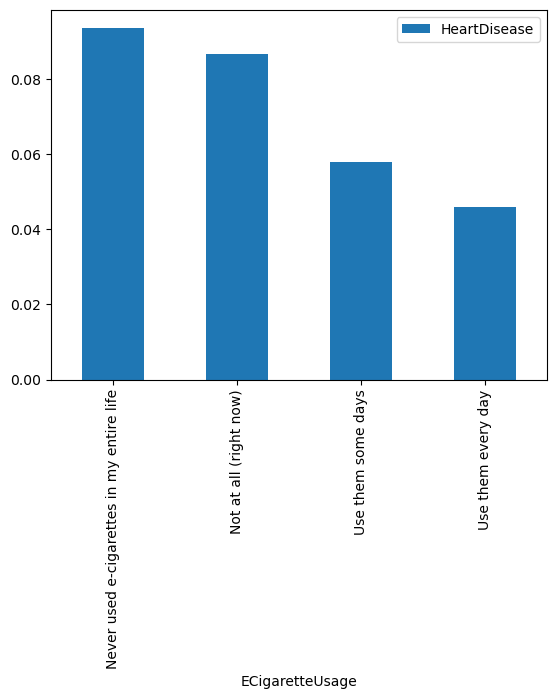

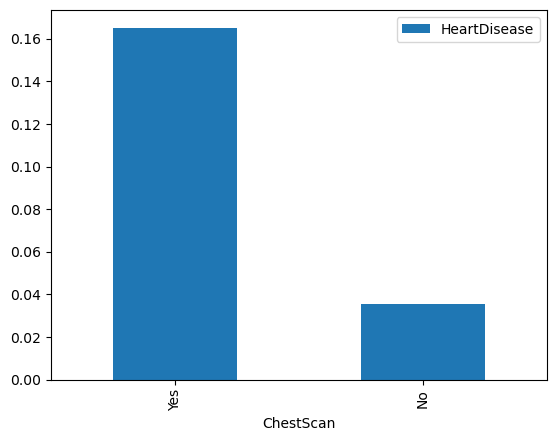

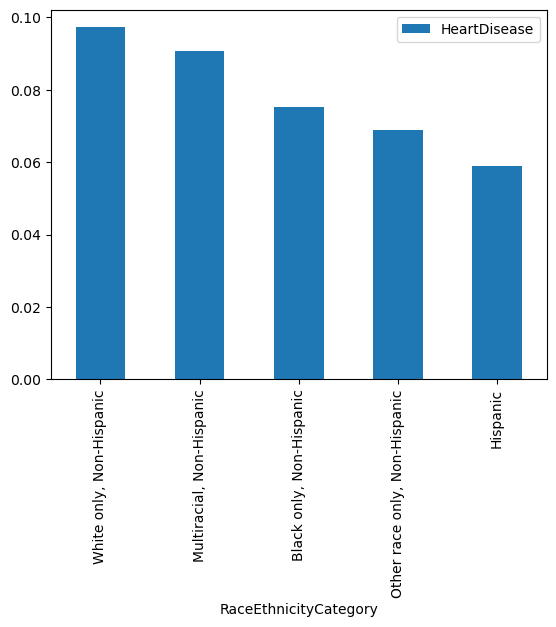

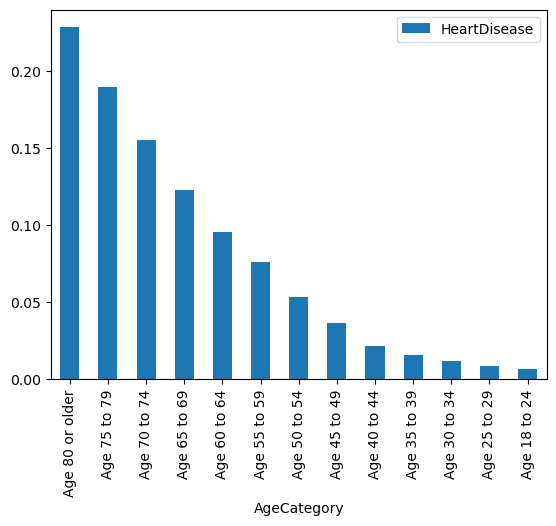

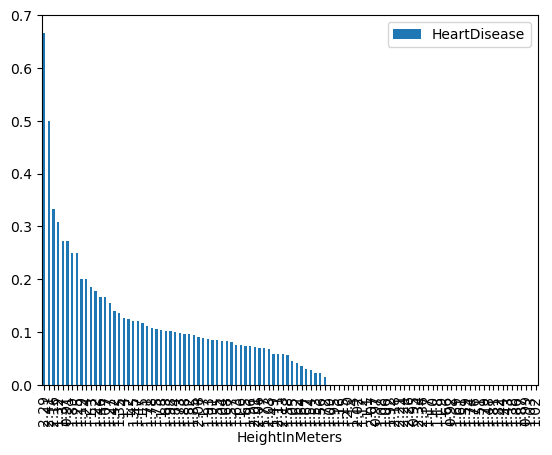

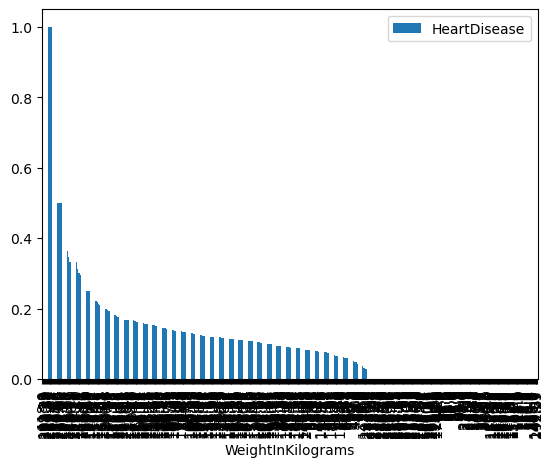

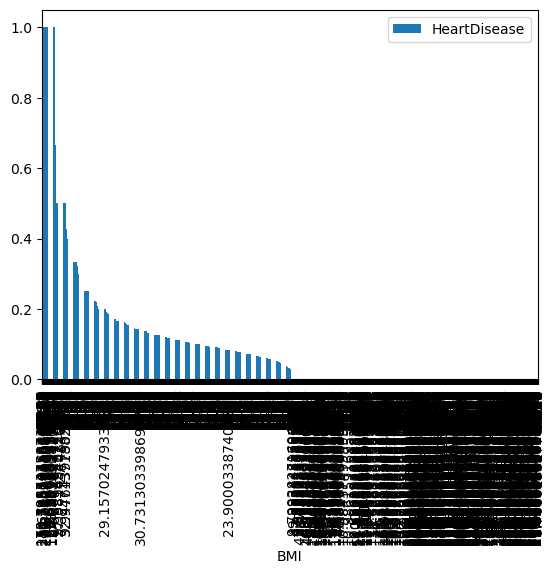

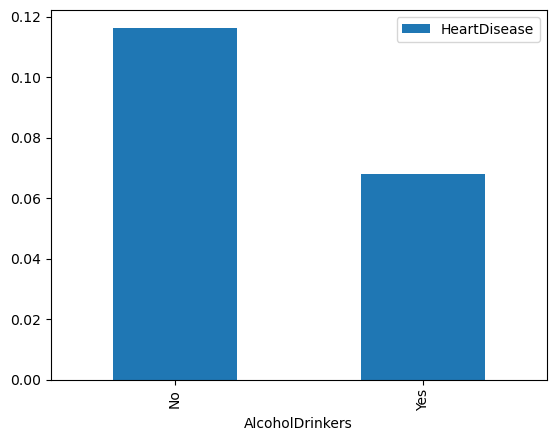

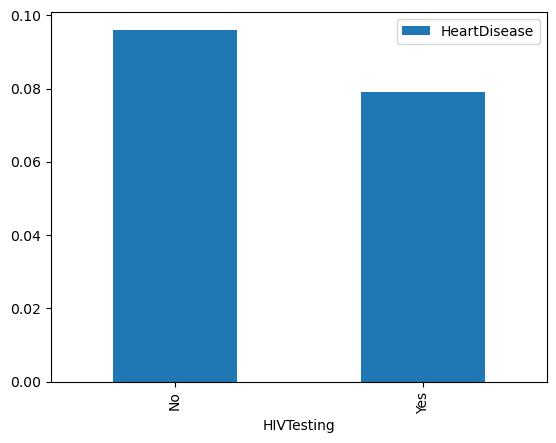

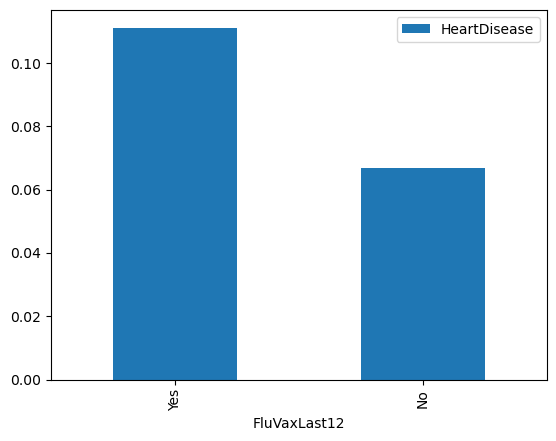

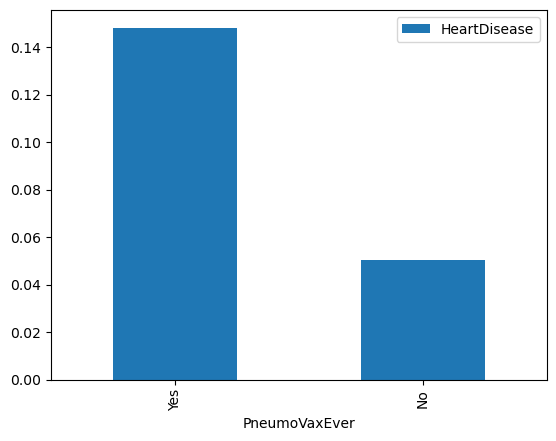

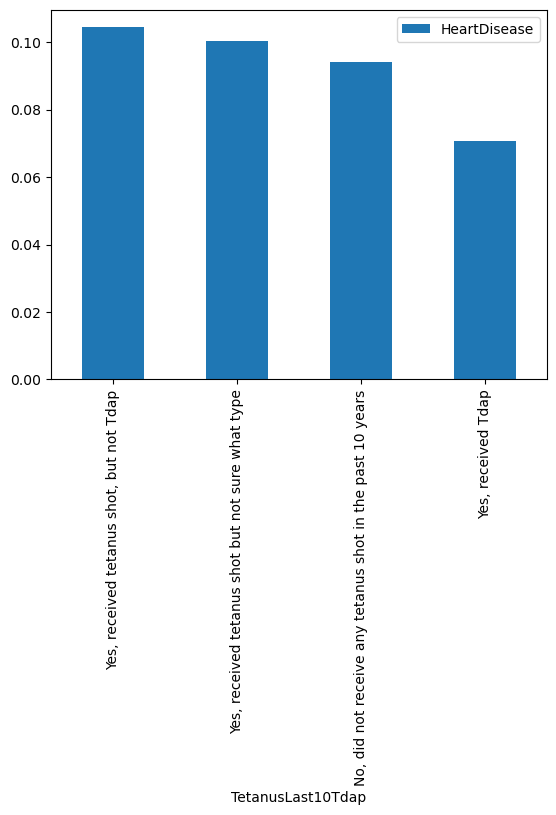

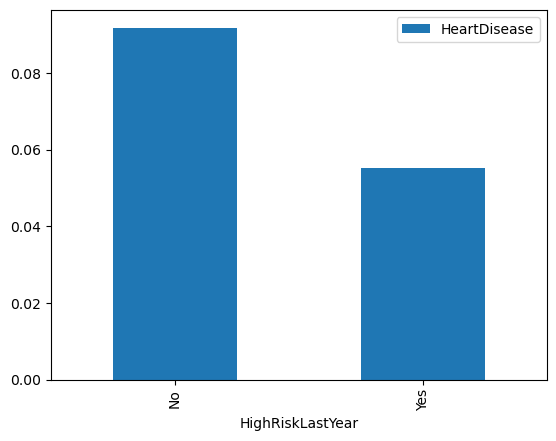

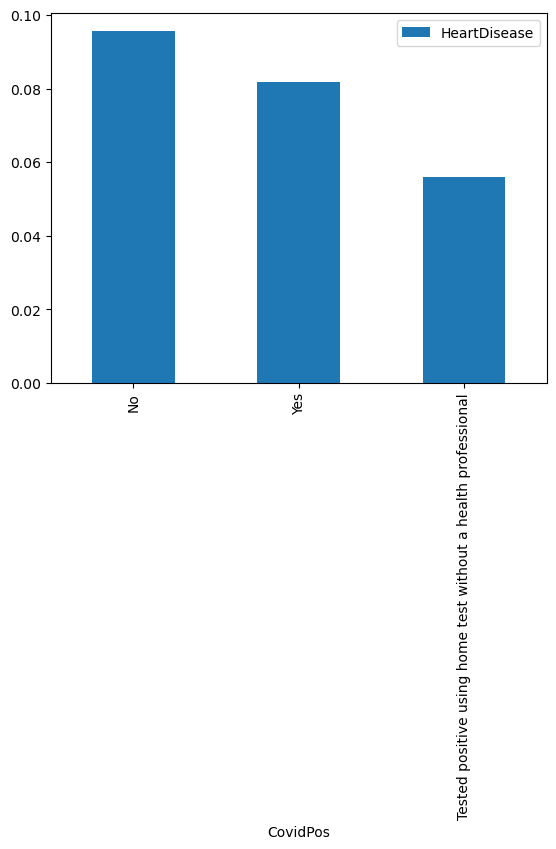

In [10]:
for col in temp.columns:
    temp[[col, 'HeartDisease']].groupby([col]).mean().sort_values(by = 'HeartDisease', ascending = False).plot.bar()

# temp[['State', 'HeartDisease']].groupby(['State']).mean().sort_values(by = 'HeartDisease', ascending = False).plot.bar()

In [67]:
temp_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274034 entries, 0 to 274033
Data columns (total 49 columns):
 #   Column                                                                       Non-Null Count   Dtype  
---  ------                                                                       --------------   -----  
 0   State                                                                        274034 non-null  int32  
 1   Sex                                                                          274034 non-null  int32  
 2   GeneralHealth                                                                274034 non-null  int32  
 3   PhysicalHealthDays                                                           274034 non-null  float64
 4   MentalHealthDays                                                             274034 non-null  float64
 5   LastCheckupTime                                                              274034 non-null  int32  
 6   PhysicalActivities          

In [60]:
temp_encoded.describe()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,LungDisease,"RaceEthnicityCategory_Black only, Non-Hispanic",RaceEthnicityCategory_Hispanic,"RaceEthnicityCategory_Multiracial, Non-Hispanic","RaceEthnicityCategory_Other race only, Non-Hispanic","RaceEthnicityCategory_White only, Non-Hispanic","TetanusLast10Tdap_No, did not receive any tetanus shot in the past 10 years","TetanusLast10Tdap_Yes, received Tdap","TetanusLast10Tdap_Yes, received tetanus shot but not sure what type","TetanusLast10Tdap_Yes, received tetanus shot, but not Tdap"
count,274034.000000,274034.000000,274034.000000,274034.000000,274034.000000,274034.000000,274034.000000,274034.000000,274034.000000,274034.000000,...,274034.000000,274034.000000,274034.000000,274034.000000,274034.000000,274034.000000,274034.000000,274034.000000,274034.000000,274034.000000
mean,27.447065,0.475470,2.461136,4.233347,4.223480,0.329930,0.767711,7.025698,0.681204,0.056340,...,0.197760,0.080384,0.093167,0.022523,0.049505,0.754421,0.339133,0.279535,0.301568,0.079764
std,15.521083,0.499399,1.042482,8.472746,8.140875,0.767337,0.422293,1.455640,0.877973,0.230577,...,0.398311,0.271888,0.290667,0.148376,0.216920,0.430431,0.473416,0.448771,0.458940,0.270928
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,7.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,42.000000,1.000000,3.000000,4.000000,4.000000,0.000000,1.000000,8.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,53.000000,1.000000,4.000000,30.000000,30.000000,3.000000,1.000000,24.000000,3.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 이상치 처리

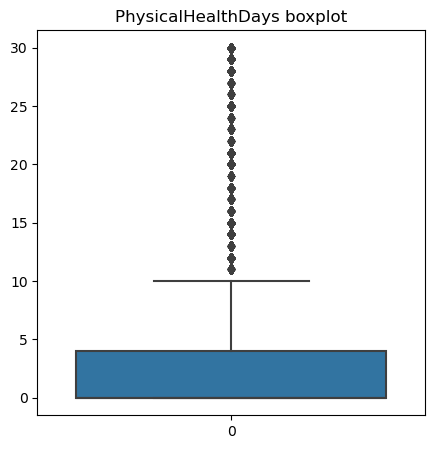

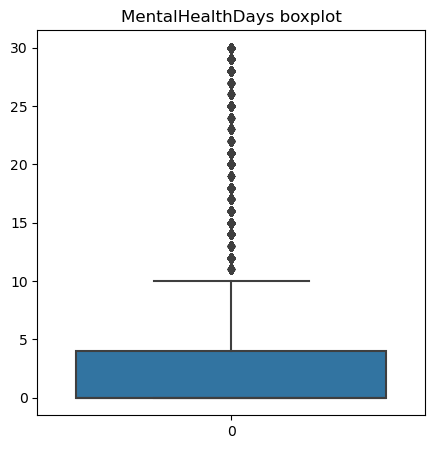

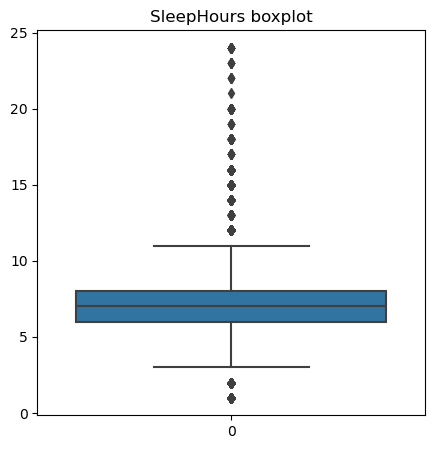

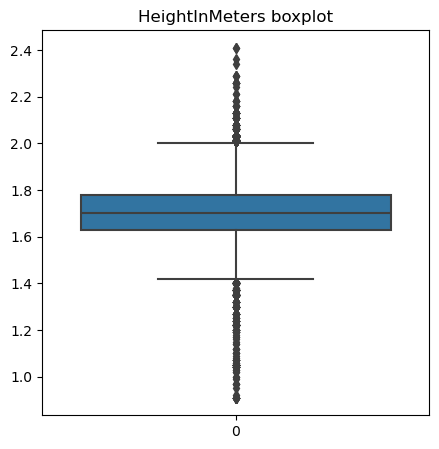

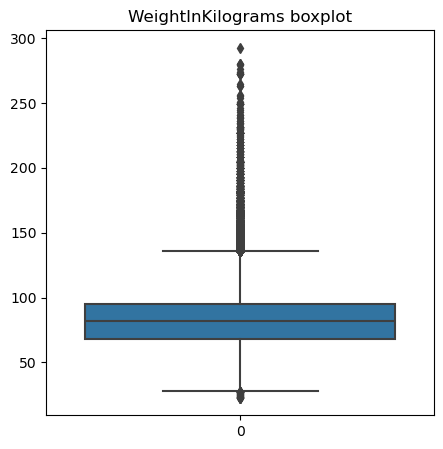

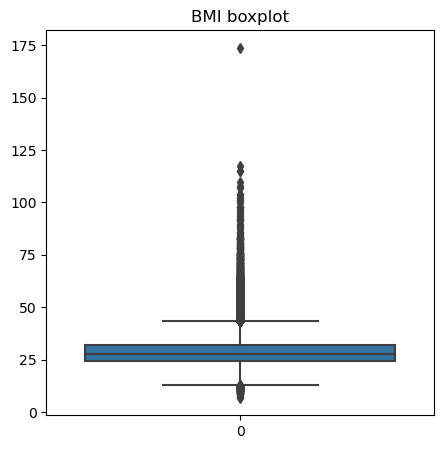

In [9]:
for col in temp_encoded.select_dtypes(include = [float]).columns:
    f,ax=plt.subplots(1,figsize=(5,5))
    plt.title(col + " boxplot")
    sns.boxplot(data = temp_encoded[col])



In [10]:
#나누기전에 이상치 제거. Height, weight , BMI, sleeping hour 에 비정상적인 데이터들이 보임. 
# 다른 float 데이터인 physical day health, mental day health 는 계속 아프거나 안아플수 있다고 생각함.

arr = []

for cols in temp_encoded[['BMI', 'SleepHours', 'WeightInKilograms', 'HeightInMeters']]:
    Q1 = np.percentile(temp_encoded[cols], 25, method='midpoint')
    Q3 = np.percentile(temp_encoded[cols], 75, method='midpoint')
    IQR = Q3-Q1
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR

    upper_array = temp_encoded.loc[temp_encoded[cols] >= upper].index.values
    lower_array = temp_encoded.loc[temp_encoded[cols] <= lower].index.values
    # create bool val to indicate outlier rows.
    # array = np.where(temp_encoded[cols] <= lower or temp_encoded[cols] >= upper)[0]
    # lower_array = np.where(temp_encoded[cols] <= lower)[0]

    arr = np.hstack((arr , upper_array , lower_array))


    
# remove the outliers
temp_encoded.drop(index=np.unique(arr), inplace=True)

# temp_encoded.shape

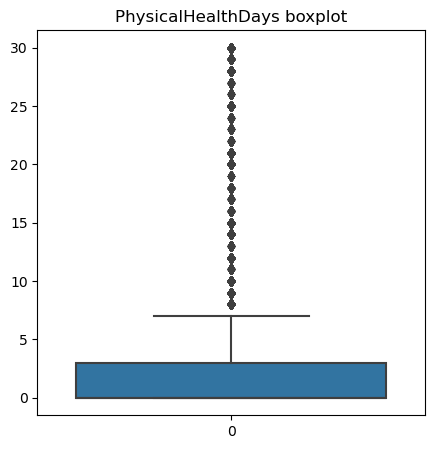

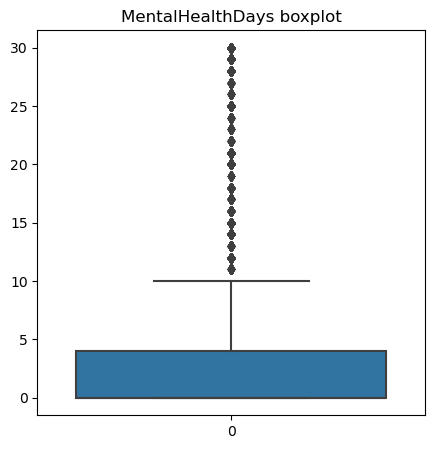

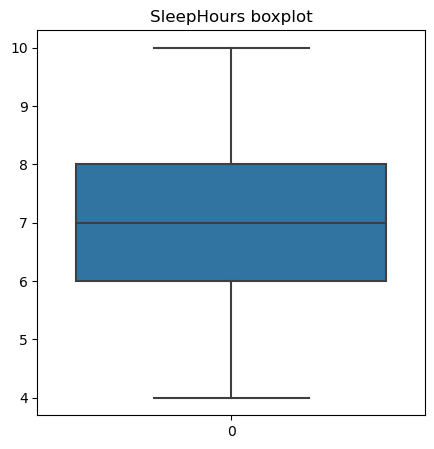

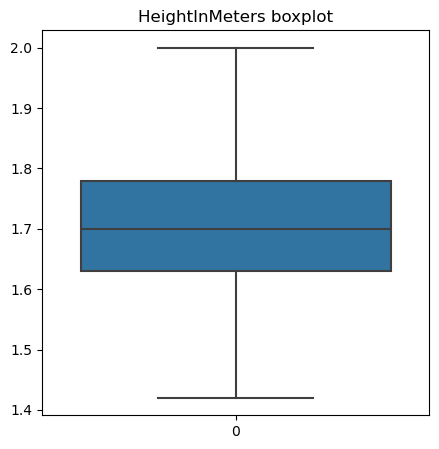

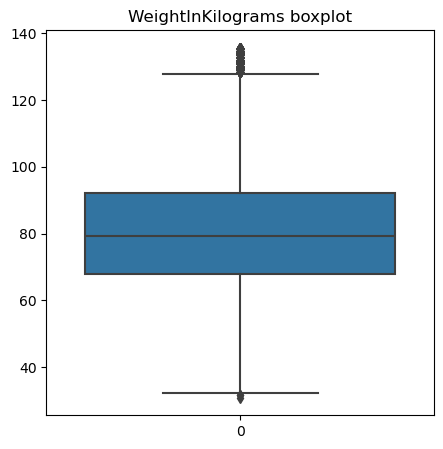

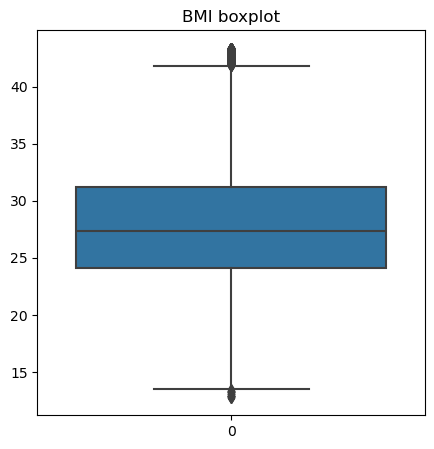

In [11]:
for col in temp_encoded.select_dtypes(include = [float]).columns:
    f,ax=plt.subplots(1,figsize=(5,5))
    plt.title(col + " boxplot")
    sns.boxplot(data = temp_encoded[col])


<Axes: >

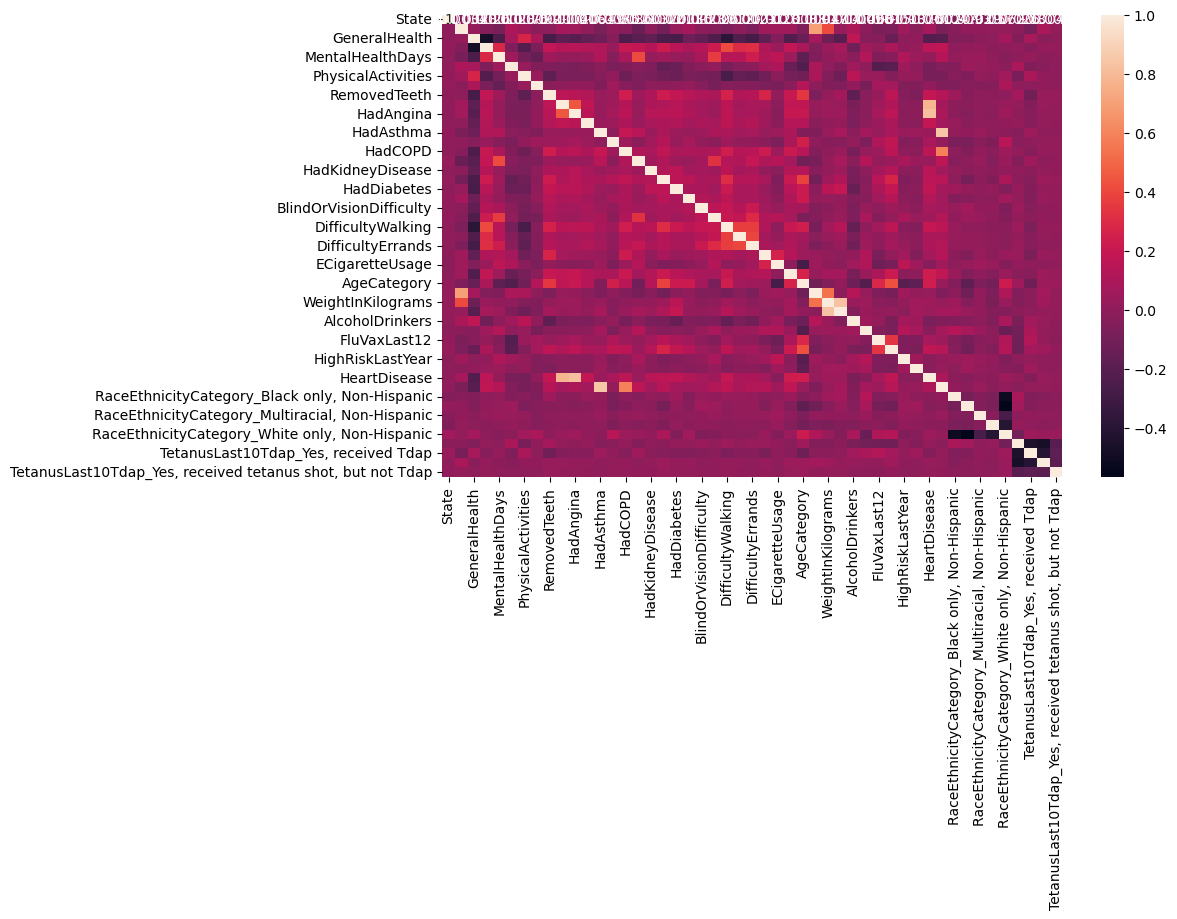

In [12]:
cor = temp_encoded.corr()

%matplotlib inline

plt.figure(figsize = (10,6))
sns.heatmap(cor, annot = True)

# 데이터 imbalance 처리 전 돌려보기

In [13]:
train_x = temp_encoded.drop(columns=['HeartDisease', "HadHeartAttack", "HadAngina" ])
train_y = temp_encoded['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=1234)

RandomForest

In [14]:
#random forest 는 스케일링이 크게 필요없음.
rf_clf = RandomForestClassifier(n_estimators=100, max_depth= 10, random_state=1234)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
acc_rf_clf = accuracy_score(y_test,rf_pred)
rf_f1 = f1_score(y_test,rf_pred)
print(f'Random Forest Accuracy : {acc_rf_clf*100:.2f}%')

#n_estimator 1000 = 91.38
print(np.unique(rf_pred))
print(rf_f1)


Random Forest Accuracy : 91.32%
[0 1]
0.040491061813482665


In [15]:
#스케일링 
ma = MaxAbsScaler()
X_train_scaled = ma.fit_transform(X_train)
X_test_scaled = ma.transform(X_test)

#LGB 돌려보기
lgb_clf = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=1234, verbose=-1)
lgb_clf.fit(X_train_scaled, y_train)

#model accuracy
lgb_pred = lgb_clf.predict(X_test_scaled)
lgb_acc = accuracy_score(y_test, lgb_pred)
print(f'LightGBM Accuracy : {lgb_acc*100:.2f}%')
print(np.unique(lgb_pred))
print(f1_score(y_test,lgb_pred))

LightGBM Accuracy : 91.44%
[0 1]
0.1653363740022805


LightGBM

In [16]:
#스케일링 
rbs = RobustScaler()
X_train_scaled = rbs.fit_transform(X_train)
X_test_scaled = rbs.transform(X_test)

#LGB 돌려보기
lgb_clf = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=1234, verbose=-1)
lgb_clf.fit(X_train_scaled, y_train)

#model accuracy
lgb_pred = lgb_clf.predict(X_test_scaled)
lgb_acc = accuracy_score(y_test, lgb_pred)
print(f'LightGBM Accuracy : {lgb_acc*100:.2f}%')
print(np.unique(lgb_pred))
print(f1_score(y_test,lgb_pred))

LightGBM Accuracy : 91.46%
[0 1]
0.16146929405012436


SVM

In [29]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [19]:
svm_clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm_clf.fit(X_train,y_train)

svm_pred = svm_clf.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)

print(f'SVM SS Accuracy : {svm_acc*100:.2f}%')
print(np.unique(svm_pred))
print(f1_score(y_test,svm_pred))


SVM SS Accuracy : 91.42%
[0 1]
0.16146929405012436


In [34]:
# from sklearn.ensemble import BaggingClassifier

# svm_clf = BaggingClassifier(estimator=SVC(),
#                             n_estimators=10,
#                             random_state=1234).fit(X_train_scaled, y_train)


# svm_pred = svm_clf.predict(X_test_scaled)
# svm_acc = accuracy_score(y_test, svm_pred)

# print(f'SVM SS Accuracy : {svm_acc*100:.2f}%')
# print(np.unique(svm_pred))
# print(f1_score(y_test,svm_pred))

SVM Robust Accuracy : 91.44%
[0 1]
0.1258212223770655


In [36]:
import cupy as cp 

gpu_x_train = cp.array(X_train)
gpu_x_test = cp.array(X_test)
gpu_y_train = cp.array(y_train)
gpu_y_test = cp.array(y_test)

# export CUPY_GPU_METRIC = 1
cp.cuda.Device(0).use()

<CUDA Device 0>

In [28]:
svm_clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm_clf.fit(gpu_x_train,gpu_y_train)

svm_clf.predict(gpu_x_test)
svm_acc = accuracy_score(y_test, svm_pred)

print(f'SVM Robust Accuracy : {svm_acc*100:.2f}%')
print(np.unique(svm_pred))
print(f1_score(y_test,svm_pred))

NameError: name 'svm_pred' is not defined

In [26]:
# print(cp.cuda.Device())
# num_devices = cp.cuda.runtime.getDeviceCount()
# print(num_devices)
# for i in range(num_devices):
#     device_props = cp.cuda.runtime.getDeviceProperties(i)
#     print(f"Device {i}: {device_props['name']}")

<CUDA Device 0>
1
Device 0: b'NVIDIA GeForce RTX 4070 Ti SUPER'


In [37]:
import torch

torch.cuda.is_available()

True

# SMOTE

In [38]:
from imblearn.over_sampling import SMOTE

X = temp_encoded.drop(columns=['HeartDisease', "HadHeartAttack", "HadAngina", 'State' ])
y = temp_encoded['HeartDisease']

print('Original Dataset shape %s' % Counter(y))
smo = SMOTE(random_state = 1234)
X_smo, y_smo = smo.fit_resample(X, y)
print('Resampled Dataset shape %s' % Counter(y_smo))

smoDF = pd.concat([X_smo, y_smo], axis = 1)

tmp_yes = temp_encoded[temp_encoded['HeartDisease'] == 1]
smo_yes = smoDF[smoDF['HeartDisease'] == 1]


print(tmp_yes.duplicated().sum())
print(smo_yes.duplicated().sum())

Original Dataset shape Counter({0: 234057, 1: 22525})
Resampled Dataset shape Counter({0: 234057, 1: 234057})
1
2624


In [39]:
print('Original Dataset shape %s' % Counter(y))
smo = SMOTE(sampling_strategy = 0.8, random_state = 1234)
X_smo, y_smo = smo.fit_resample(X, y)
print('Resampled Dataset shape %s' % Counter(y_smo))
smoDF = pd.concat([X_smo, y_smo], axis = 1)

smoDF = pd.concat([X_smo, y_smo], axis = 1)
smo_yes = smoDF[smoDF['HeartDisease'] == 1]
print(tmp_yes.duplicated().sum())
print(smo_yes.duplicated().sum())

Original Dataset shape Counter({0: 234057, 1: 22525})
Resampled Dataset shape Counter({0: 234057, 1: 187245})
1
1848


SVM SMOTE

In [46]:
#16min
from imblearn.over_sampling import SVMSMOTE
print('Original Dataset shape %s' % Counter(y))
svms = SVMSMOTE(random_state = 1234)
X_svms, y_svms = svms.fit_resample(X, y)
print('Resampled Dataset shape %s' % Counter(y_svms))

Original Dataset shape Counter({0: 249272, 1: 24762})
Resampled Dataset shape Counter({0: 249272, 1: 249272})


In [47]:
svmsDF = pd.concat([X_svms, y_svms], axis = 1)
svms_yes = svmsDF[svmsDF['HeartDisease'] == 1]
print(svms_yes.duplicated().sum())

3081


SMOTEENN

In [52]:
#2min 37sec
from imblearn.combine import SMOTEENN
print('Original Dataset shape %s' % Counter(y))
sme = SMOTEENN(random_state = 1234)
X_sme, y_sme = sme.fit_resample(X, y)
print('Resampled Dataset shape %s' % Counter(y_sme))

Original Dataset shape Counter({0: 249272, 1: 24762})
Resampled Dataset shape Counter({1: 248411, 0: 161444})


In [53]:
smeDF = pd.concat([X_sme, y_sme], axis = 1)
sme_yes = smeDF[smeDF['HeartDisease'] == 1]
print(sme_yes.duplicated().sum())

2551


Train with the smoDF

In [49]:
train_x = smoDF.drop(columns=['HeartDisease' ])
train_y = pd.array(smoDF['HeartDisease'])

X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=1234)


GeneralHealth                                                                  114378.201217
AgeCategory                                                                     88771.732429
AlcoholDrinkers                                                                 46259.519241
PhysicalActivities                                                              38626.401168
TetanusLast10Tdap_Yes, received Tdap                                            27707.080488
CovidPos                                                                        27171.059439
LastCheckupTime                                                                 26970.227146
ChestScan                                                                       26189.554462
HIVTesting                                                                      24512.852034
PhysicalHealthDays                                                              23167.594588
ECigaretteUsage                                                       

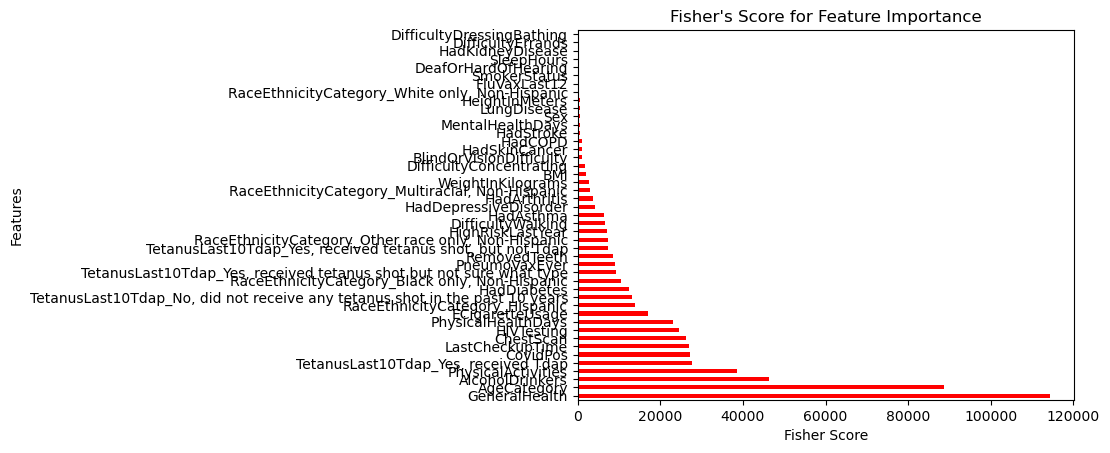

In [18]:
#Fisher's score 로 feature importance 보기
from sklearn.feature_selection import f_classif

#스코어 계산
# Compute Fisher scores
scores, _ = f_classif(X_train, y_train)

feature_impt = pd.Series(scores, index=X_train.columns)

feature_impt_sorted = feature_impt.sort_values(ascending=False)
print(feature_impt_sorted[:20])

#그래프 그리기
%matplotlib inline
feature_impt_sorted.plot(kind='barh', color = 'red')
plt.xlabel('Fisher Score')
plt.ylabel('Features')
plt.title("Fisher's Score for Feature Importance")
plt.show()

In [29]:
# feature_impt_sorted.index
## feature 숫자 20개만 넣고 돌려보기

# train_x = smoDF[feature_impt_sorted[:20].index.to_list()]
# train_y = smoDF['HeartDisease']

# X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=1234)

Random Forest

In [50]:
#random forest 는 스케일링이 크게 필요없음.
rf_clf = RandomForestClassifier(n_estimators=100, max_depth= 10, random_state=1234)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
acc_rf_clf = accuracy_score(y_test,rf_pred)
print(f'Random Forest Accuracy : {acc_rf_clf*100:.2f}%')

#n_estimator 1000 = 91.38
print(np.unique(rf_pred))
print(f1_score(y_test,rf_pred))

Random Forest Accuracy : 85.58%
[0. 1.]
0.8378995129111897


In [52]:
# #스케일링 
# rbs = RobustScaler()
# X_train_scaled = rbs.fit_transform(X_train)
# X_test_scaled = rbs.transform(X_test)



In [51]:
lgb_clf = make_pipeline(RobustScaler(),
                        lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=1234, verbose=-1) )

# lgb_clf = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=1234, verbose=-1)
lgb_clf.fit(X_train, y_train)

#model accuracy
lgb_pred = lgb_clf.predict(X_test)
lgb_acc = accuracy_score(y_test, lgb_pred)
print(f'LightGBM Accuracy : {lgb_acc*100:.2f}%')
print(np.unique(lgb_pred))
print(f1_score(y_test,lgb_pred))

LightGBM Accuracy : 93.59%
[0. 1.]
0.9241948153967007


Deep Learning

In [52]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [57]:
#스케일링 
rbs = RobustScaler()
X_train_scaled = rbs.fit_transform(X_train)
X_test_scaled = rbs.transform(X_test)

print(X_train_scaled.shape)

#tensor 로 변환
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

#그것으로 data loader 생성
train_ds = TensorDataset(X_train_tensor, y_train_tensor)
test_ds = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(dataset = train_ds, batch_size = 100, shuffle=True)
test_loader = DataLoader(dataset = test_ds, batch_size = 100, shuffle=True)



(337041, 45)


In [14]:
prob = {}
for col in df.select_dtypes(exclude= [float]).columns:
    if col != 'HeartDisease' :
        prob[col] = df[[col, 'HeartDisease']].groupby([col]).mean().sort_values(by = 'HeartDisease', ascending = False)['HeartDisease'].to_dict()

# for col, prob_dict in prob.items():
#     print(f"Probabilities for {col}:")
#     for value, prob in prob_dict.items():
#         print(f"{value}: {prob}")
# print(len(prob['State']))
# for val in prob['State'].items():
#     print(f"{val}")
    


NameError: name 'df' is not defined

In [ ]:

for col in df.select_dtypes(exclude= [float]).columns:
    if col != 'HeartDisease':
        df[[col, 'HeartDisease']].groupby([col]).mean().sort_values(by = 'HeartDisease', ascending = False).plot.bar()
        # prob[col] = df[[col, 'HeartDisease']].groupby([col]).mean().sort_values(by = 'HeartDisease', ascending = False)['HeartDisease'].to_dict()
    